# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [1]:
import pandas as pd

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [7]:
dataset = pd.read_csv('auto_industry.csv')

In [8]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [9]:
dataset.isnull().sum()
dataset.dropna(inplace = True)
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Calcule quantos modelos foram lançados em anos pares

In [10]:
even = dataset[dataset['model_year'] % 2 == 0]
even.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Crie uma coluna para a marca do veículo e outra para o nome

In [11]:
dataset['name'].str.split(' ',n=1, expand=True)[[0,1]].rename({0:'Marca',1:'Nome'},axis=1)

,Marca,Nome
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino
...,...,...
393,ford,mustang gl
394,vw,pickup
395,dodge,rampage
396,ford,ranger


## É posível identificar alguma relação entre mpg e acceleration?

<AxesSubplot:>

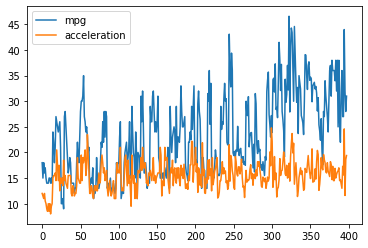

In [12]:
dataset[['mpg','acceleration']].plot()

## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [15]:
dataset[['origin']].groupby('origin').agg(dataset['origin'] == 'usa')

IndexError: index 0 is out of bounds for axis 0 with size 0

## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [30]:
dataset[['origin','cylinders','horsepower']].groupby(['origin','cylinders']).mean()

horsepower
origin cylinders            
europe 4           78.311475
       5           82.333333
       6          113.500000
japan  3           99.250000
       4           75.579710
       6          115.833333
usa    4           80.956522
       6           99.671233
       8          158.300971

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

# Bônus - estatística

## Apresente a centralidade, dispersão e distribuição das variáveis

## Gere matriz e gráfico de correlação

## Eliminando os elementos `'origin'`, `'name'`, `'model_year'`, calcule a matriz de correlação entre atributos remanecentes, incluindo apenas aquelas correlações em que o módulo supera o corte de `0.8`, discuta também suas relações de proporcionalidade.

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

## Crie uma nova coluna com a relação peso/potência para cada veículo e plote um gráfico de dispersão dessa coluna com a de consumo que você criou 